In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import re
import collections
import matplotlib.pyplot as plt

# Packages for data preparation
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Packages for modeling
from keras import models
from keras import layers
from keras import regularizers

import tensorflow_datasets as tfds
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import SimpleRNN, Activation, Dense, Dropout, Input, Embedding, LSTM
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
#from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline
from keras.utils import pad_sequences

tfds.disable_progress_bar()

In [ ]:
df=pd.read_csv('/content/Corona.csv',encoding='latin-1')

In [ ]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


<Axes: >

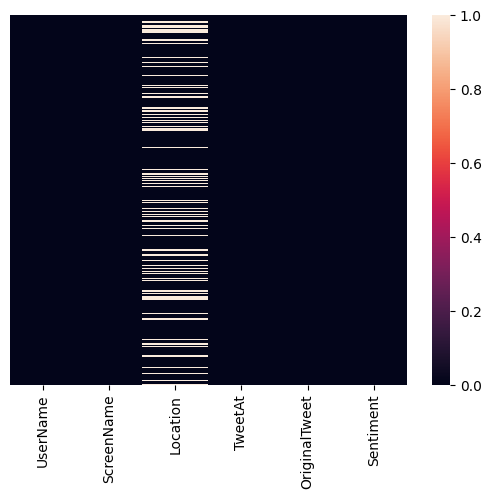

In [ ]:
sns.heatmap(df.isna(),yticklabels=False)

# Missing value treatment

In [ ]:
df['Location'].value_counts()

London                          540
United States                   528
London, England                 520
New York, NY                    395
Washington, DC                  373
                               ... 
Staffordshire Moorlands           1
Kithchener ON                     1
Tulsa, Ok                         1
Watford, South Oxhey, Bushey      1
i love you so much || he/him      1
Name: Location, Length: 12220, dtype: int64

In [ ]:
df["Location"].fillna( method ='ffill', inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       41157 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


<Axes: >

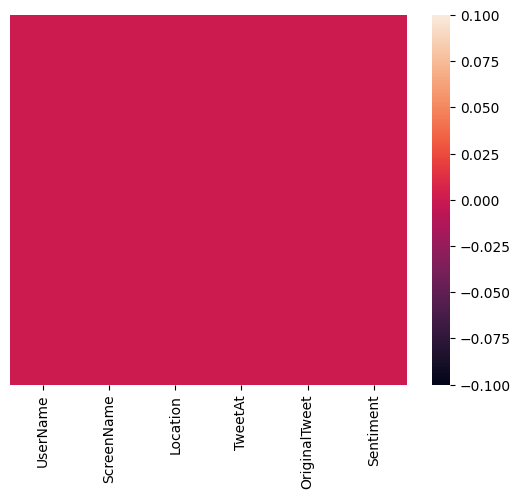

In [ ]:
sns.heatmap(df.isna(),yticklabels=False)

In [ ]:
df.describe()

,UserName,ScreenName
count,41157.000000,41157.000000
mean,24377.000000,69329.000000
std,11881.146851,11881.146851
min,3799.000000,48751.000000
25%,14088.000000,59040.000000
50%,24377.000000,69329.000000
75%,34666.000000,79618.000000
max,44955.000000,89907.000000


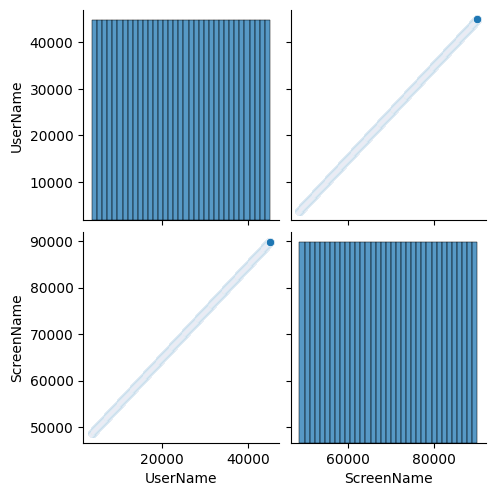

In [ ]:
sns.pairplot(data=df)

<Axes: xlabel='Sentiment', ylabel='count'>

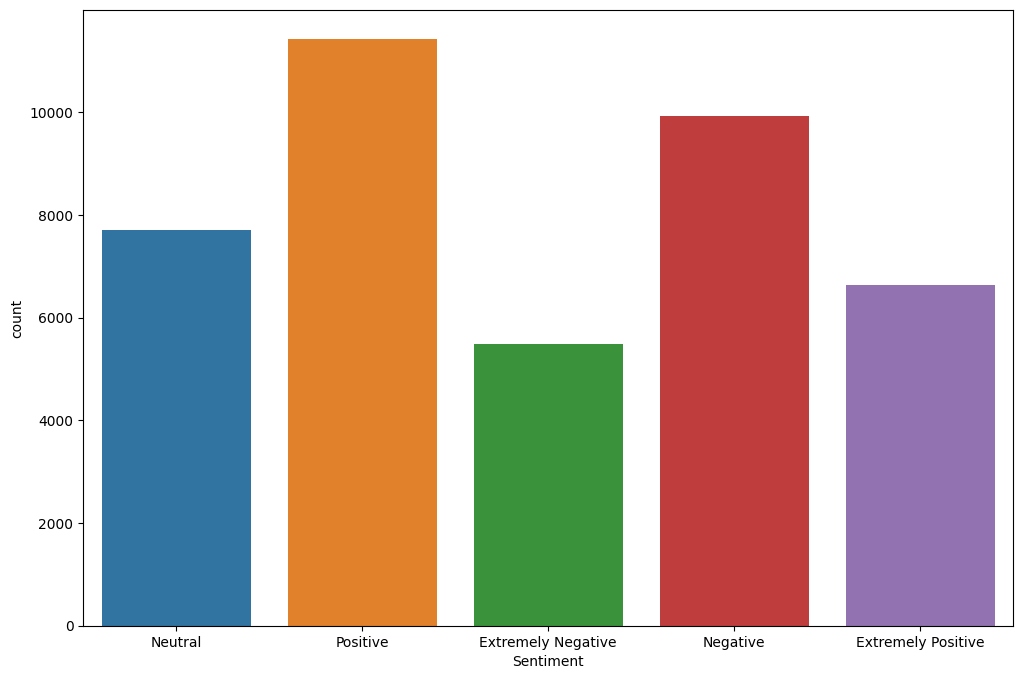

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x='Sentiment',data=df)

<Figure size 2000x3000 with 0 Axes>

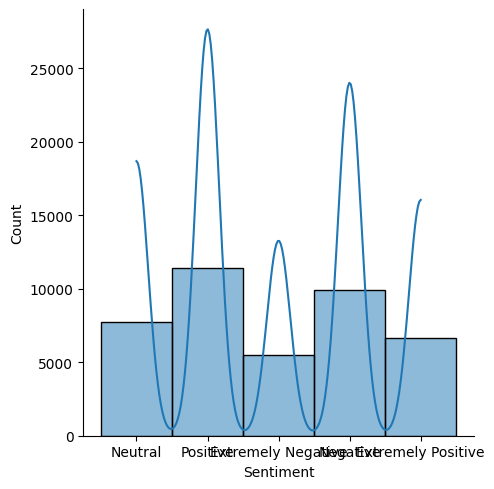

In [ ]:
plt.figure(figsize=(20,30))
sns.displot(df['Sentiment'],kde=True)

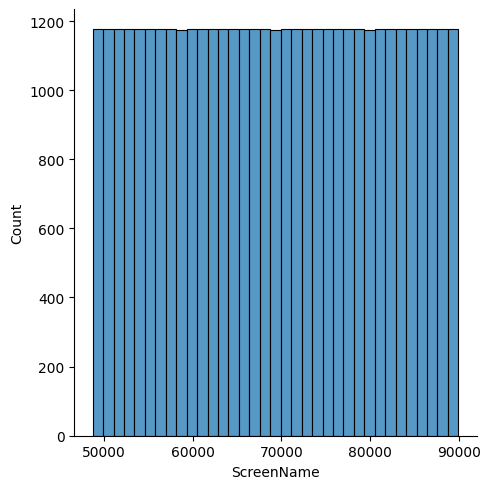

In [ ]:
sns.displot(df['ScreenName'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       41157 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


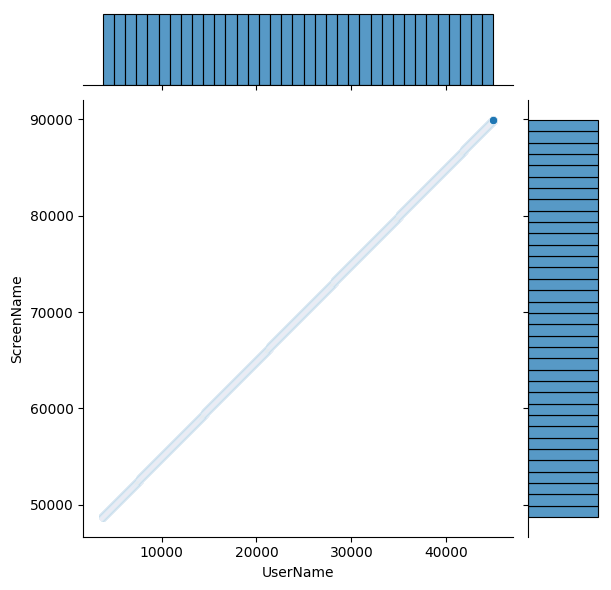

In [ ]:
sns.jointplot(x='UserName',y='ScreenName',data=df)

<Axes: xlabel='TweetAt', ylabel='count'>

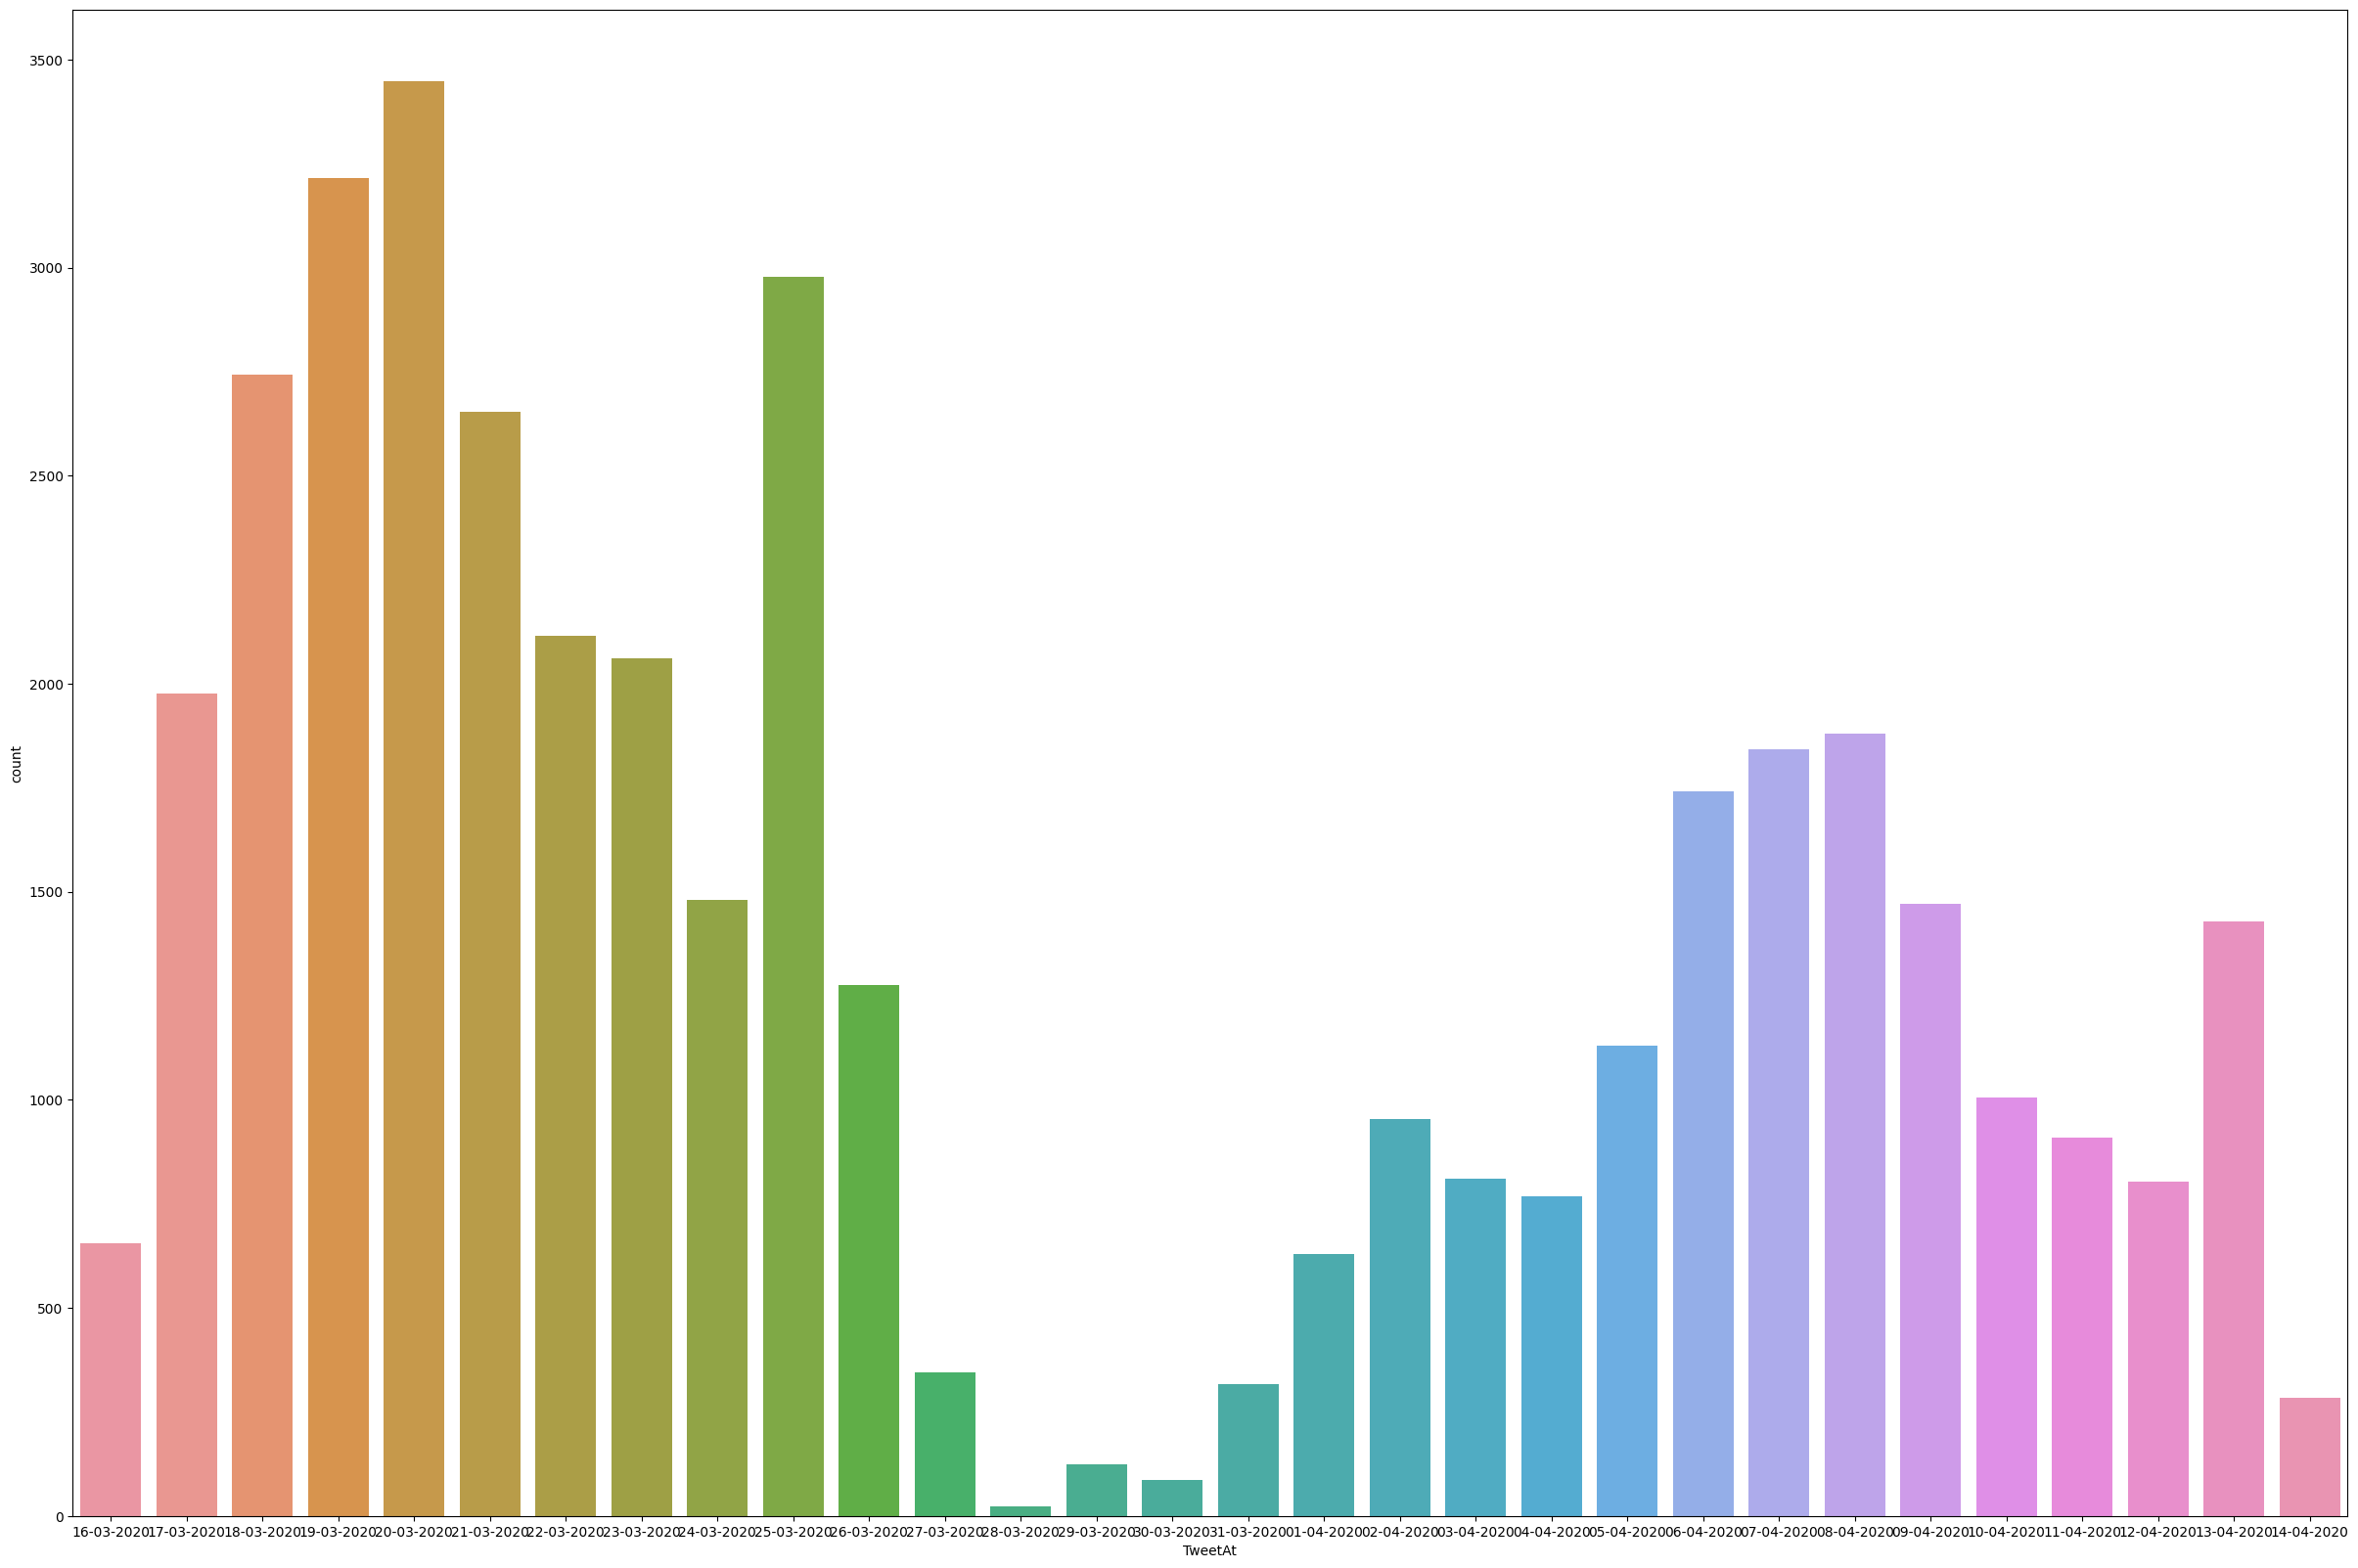

In [ ]:
plt.figure(figsize=(30,20))
sns.countplot(x='TweetAt',data=df)

In [ ]:
df['TweetAt'].value_counts()

20-03-2020    3448
19-03-2020    3215
25-03-2020    2979
18-03-2020    2742
21-03-2020    2653
22-03-2020    2114
23-03-2020    2062
17-03-2020    1977
08-04-2020    1881
07-04-2020    1843
06-04-2020    1742
24-03-2020    1480
09-04-2020    1471
13-04-2020    1428
26-03-2020    1277
05-04-2020    1131
10-04-2020    1005
02-04-2020     954
11-04-2020     909
03-04-2020     810
12-04-2020     803
04-04-2020     767
16-03-2020     656
01-04-2020     630
27-03-2020     345
31-03-2020     316
14-04-2020     284
29-03-2020     125
30-03-2020      87
28-03-2020      23
Name: TweetAt, dtype: int64

<Axes: >

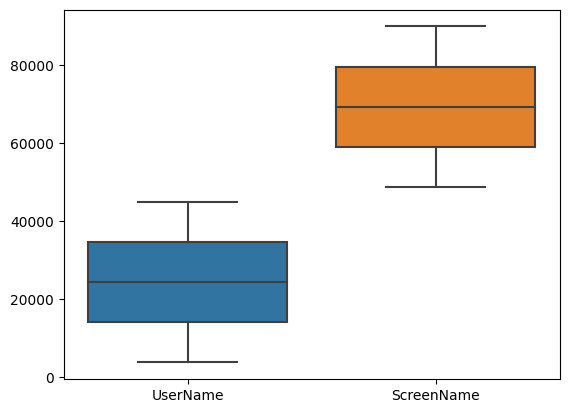

In [ ]:
sns.boxplot(data=df)

In [ ]:
df.shape

(41157, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       41157 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [ ]:
df['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [ ]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import SimpleRNN, Activation, Dense, Dropout, Input, Embedding, LSTM
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
#from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline
from keras.utils import pad_sequences
#from keras_preprocessing.sequence import pad_sequences

#from keras_preprocessing.sequence import pad_sequences
#from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
df=df[['OriginalTweet','Sentiment']]
df

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...
41152,Airline pilots offering to stock supermarket s...,Neutral
41153,Response to complaint not provided citing COVI...,Extremely Negative
41154,You know itÂs getting tough when @KameronWild...,Positive
41155,Is it wrong that the smell of hand sanitizer i...,Neutral


In [ ]:
X = df.OriginalTweet
Y = df.Sentiment
le = LabelEncoder()
Y = le.fit_transform(Y)
Y= Y.reshape(-1,1)

In [ ]:
Y

array([[3],
       [4],
       [4],
       ...,
       [4],
       [3],
       [2]])

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [ ]:
from keras.utils import pad_sequences

In [ ]:
!pip install --upgrade tensorflow
!pip install --upgrade keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# tHE ERROR

In [ ]:

'''from keras.preprocessing import sequence

max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences, maxlen=max_len)
'''

'from keras.preprocessing import sequence\n\nmax_words = 1000\nmax_len = 150\ntok = Tokenizer(num_words=max_words)\ntok.fit_on_texts(X_train)\nsequences = tok.texts_to_sequences(X_train)\nsequences_matrix = sequence.pad_sequences(sequences, maxlen=max_len)\n'

In [ ]:
#from keras.utils import pad_sequences
'''
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)
'''


'\nmax_words = 1000\nmax_len = 150\ntok = Tokenizer(num_words=max_words)\ntok.fit_on_texts(X_train)\nsequences = tok.texts_to_sequences(X_train)\nsequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)\n'

In [ ]:
from tensorflow.keras.preprocessing import sequence

max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences, maxlen=max_len)


In [ ]:
sequences[0]

[345, 13, 13, 565, 3, 115, 170, 43, 34, 3, 210, 11, 77, 7, 4, 6]

In [ ]:
for i in range(10):
    print(len(sequences[i]))

16
18
32
42
14
13
24
21
17
29


In [ ]:
for i in range(10):
    print(len(sequences_matrix[i]))

150
150
150
150
150
150
150
150
150
150


In [ ]:
X_train[0]

'@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8'

In [ ]:
def RNNmodel():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(32)(layer)
    layer = Dense(256,name='FC1',activation='relu')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [ ]:
import tensorflow as tf

In [ ]:
model = RNNmodel()
model.summary()
#model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy',tf.keras.metrics.Precision()])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy',tf.keras.metrics.Precision()])
#model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),optimizer=tf.keras.optimizers.Adam(1e-4),metrics=['accuracy',tf.keras.metrics.Precision()])

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 150)]             0         
                                                                 
 embedding_9 (Embedding)     (None, 150, 50)           50000     
                                                                 
 lstm_9 (LSTM)               (None, 32)                10624     
                                                                 
 FC1 (Dense)                 (None, 256)               8448      
                                                                 
 activation_18 (Activation)  (None, 256)               0         
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 257 

In [ ]:
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10, validation_split=0.2)

Epoch 1/10
206/206 [==============================] - 31s 137ms/step - loss: -202.7195 - accuracy: 0.1624 - precision_9: 0.8671 - val_loss: -610.4124 - val_accuracy: 0.1575 - val_precision_9: 0.8664
Epoch 2/10
206/206 [==============================] - 28s 138ms/step - loss: -1375.7822 - accuracy: 0.1620 - precision_9: 0.8668 - val_loss: -2353.4380 - val_accuracy: 0.1575 - val_precision_9: 0.8664
Epoch 3/10
206/206 [==============================] - 27s 134ms/step - loss: -3645.8315 - accuracy: 0.1620 - precision_9: 0.8668 - val_loss: -5180.9961 - val_accuracy: 0.1575 - val_precision_9: 0.8664
Epoch 4/10
206/206 [==============================] - 32s 157ms/step - loss: -6965.8574 - accuracy: 0.1620 - precision_9: 0.8668 - val_loss: -9029.3291 - val_accuracy: 0.1575 - val_precision_9: 0.8664
Epoch 5/10
206/206 [==============================] - 27s 133ms/step - loss: -11260.5703 - accuracy: 0.1620 - precision_9: 0.8668 - val_loss: -13831.8574 - val_accuracy: 0.1575 - val_precision_9: 0.

In [ ]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [ ]:
accr = model.evaluate(test_sequences_matrix,Y_test)

258/258 [==============================] - 6s 25ms/step - loss: -50328.3867 - accuracy: 0.1605 - precision_9: 0.8673


In [ ]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: -50328.387
  Accuracy: 0.160


In [ ]:
print(' LSTM Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

 LSTM Test set
  Loss: -50328.387
  Accuracy: 0.160
